In [39]:
# Update sklearn to prevent version mismatches
# !pip install sklearn --upgrade

In [40]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
# !pip install joblib

In [189]:
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV and Perform Basic Data Cleaning

In [190]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [191]:
# Set features. This will also be used as your x values.
selected_features = df[[
    'koi_fpflag_nt',
    'koi_fpflag_ss',
    'koi_fpflag_co',
    'koi_fpflag_ec',
    'koi_period',
    'koi_time0bk',
    'koi_impact',
    'koi_duration',
    'koi_depth',
    'koi_prad',
    'koi_teq',
    'koi_insol',
    'koi_model_snr',
    'koi_tce_plnt_num',
    'koi_steff',
    'koi_slogg',
    'koi_srad',
    'ra',
    'dec',
    'koi_kepmag'
]]
selected_features.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,0,0,0,0,54.418383,162.513840,0.586,4.50700,874.8,2.83,443,9.11,25.8,2,5455,4.467,0.927,291.93423,48.141651,15.347
1,0,1,0,0,19.899140,175.850252,0.969,1.78220,10829.0,14.60,638,39.30,76.3,1,5853,4.544,0.868,297.00482,48.134129,15.436
2,0,1,0,0,1.736952,170.307565,1.276,2.40641,8079.2,33.46,1395,891.96,505.6,1,5805,4.564,0.791,285.53461,48.285210,15.597
3,0,0,0,0,2.525592,171.595550,0.701,1.65450,603.3,2.75,1406,926.16,40.9,1,6031,4.438,1.046,288.75488,48.226200,15.509
4,0,0,0,0,4.134435,172.979370,0.762,3.14020,686.0,2.77,1160,427.65,40.2,2,6046,4.486,0.972,296.28613,48.224670,15.714


In [192]:
X = selected_features
y = df["koi_disposition"]

# Create a Train Test Split

Use `koi_disposition` for the y values

In [193]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify =y)

In [194]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
4002,0,0,1,0,99.673478,219.334830,11.6846,0.9680,2496.0,576.14,262,1.11,12.6,2,4932,4.777,0.492,293.05801,45.248821,15.801
4246,0,1,0,0,0.592244,131.654831,0.9860,1.3860,3992.4,6.77,1551,1361.22,303.8,1,4920,4.664,0.591,290.28094,45.464260,15.653
548,0,1,1,0,9.991625,137.447816,1.2560,3.8552,3450.5,38.93,907,160.14,220.3,1,5874,4.338,1.096,301.04239,45.022888,14.039
3953,0,1,0,0,178.412990,218.225235,0.9360,2.9298,37510.0,33.24,361,4.00,535.1,1,6078,4.346,1.148,288.32785,38.627621,13.944
2362,0,0,0,0,45.294223,138.678725,0.0250,6.8300,477.1,2.26,524,17.75,134.8,1,5676,4.347,1.044,285.67938,50.241299,10.961


In [195]:
from collections import Counter
Counter(y_train)

Counter({'FALSE POSITIVE': 2628, 'CONFIRMED': 1350, 'CANDIDATE': 1265})

It looks fairly balanced

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [196]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
X_train_scaled = MinMaxScaler().fit(X_train)
X_test_scaled = X_train_scaled.transform(X_test)
X_train_scaled = X_train_scaled.transform(X_train)

# Train the SVM Model



In [121]:
# Create the SVC Model
from sklearn.svm import SVC 
svm_model = SVC(kernel='linear')
# svm_model = SVC(kernel='rbf')
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [122]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC 
from sklearn import set_config
set_config(display="diagram")
pipe = make_pipeline(svm_model)
pipe

Pipeline(steps=[('svc', SVC(kernel='linear'))])

In [130]:
print(f"Training Data Score: {svm_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {svm_model.score(X_test_scaled, y_test)}")

Training Data Score: 0.8100324241846272
Testing Data Score: 0.8077803203661327


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

SVM MODEL with GridSearchCV

In [131]:
# Create the GridSearchCV model

from sklearn.model_selection import GridSearchCV
param_grid = {
                "C": [0.1,1,10,50,100],
                "gamma" : [0.0001, 0.001, 0.01, 0.1]
            }
svm_grid_model = GridSearchCV(svm_model, param_grid)

In [132]:
# Train the model with GridSearch
svm_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 50, 100],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [133]:
print(svm_grid_model.best_params_)
print(svm_grid_model.best_score_)

{'C': 100, 'gamma': 0.0001}
0.8224261201143946


In [134]:
print(f"Training Data Score: {svm_grid_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {svm_grid_model.score(X_test_scaled, y_test)}")

Training Data Score: 0.8251001335113485
Testing Data Score: 0.8180778032036613


# Train the Decision Tree Model

In [135]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
acc=clf.score(X_test, y_test)

In [136]:
print(f"Accuracy = {acc}")
print(f"Training Data Score: {clf.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {clf.score(X_test_scaled, y_test)}")

Accuracy = 0.8506864988558352
Training Data Score: 0.364104520312798
Testing Data Score: 0.36498855835240274


# Train the Random Forest Model

In [137]:
# Create a random forest classifier
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(n_estimators=200)
random_forest_model = random_forest_model.fit(X_train, y_train)
acc = random_forest_model.score(X_test, y_test)
random_forest_model

RandomForestClassifier(n_estimators=200)

In [138]:
# Random Forests in sklearn will automatically calculate feature importance
importances = random_forest_model.feature_importances_
importances

array([0.12849729, 0.09452754, 0.12622462, 0.04255944, 0.04516724,
       0.02799195, 0.03708467, 0.03357124, 0.05145918, 0.08924142,
       0.03118436, 0.03399983, 0.1252052 , 0.00789684, 0.02188964,
       0.01991907, 0.020771  , 0.02096542, 0.02088028, 0.02096377])

In [139]:
# We can sort the features by their importance
sorted(zip(clf.feature_importances_, selected_features), reverse=True)

[(0.1938252855953321, 'koi_fpflag_nt'),
 (0.18032281790265772, 'koi_fpflag_co'),
 (0.17466552832463342, 'koi_fpflag_ss'),
 (0.14193660944401584, 'koi_model_snr'),
 (0.03321292367799734, 'koi_impact'),
 (0.033095153322120256, 'koi_fpflag_ec'),
 (0.030512916941726097, 'koi_duration'),
 (0.02376351945213884, 'dec'),
 (0.023646845741565135, 'koi_period'),
 (0.022663377898388234, 'koi_prad'),
 (0.019821559213807165, 'koi_time0bk'),
 (0.01980276780719239, 'koi_depth'),
 (0.019311387769623923, 'ra'),
 (0.018089433027761694, 'koi_kepmag'),
 (0.016779241292502255, 'koi_steff'),
 (0.01263757171045498, 'koi_insol'),
 (0.011473609867247334, 'koi_slogg'),
 (0.009585154878748002, 'koi_teq'),
 (0.008192305085688857, 'koi_tce_plnt_num'),
 (0.006661991046398438, 'koi_srad')]

In [140]:
print(f"Accuracy = {acc}")
print(f"Training Data Score: {random_forest_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {random_forest_model.score(X_test_scaled, y_test)}")

Accuracy = 0.8964530892448512
Training Data Score: 0.7385084875071524
Testing Data Score: 0.738558352402746


RANDOM FOREST MODEL with GridSearchCV

In [141]:
param_grid_2 = {"n_estimators": [50, 100, 150, 200, 250],
             "max_depth":[100, 200, 300] }

In [142]:
random_forest_grid_model = GridSearchCV(random_forest_model, param_grid_2)

In [143]:
random_forest_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(estimator=RandomForestClassifier(n_estimators=200),
             param_grid={'max_depth': [100, 200, 300],
                         'n_estimators': [50, 100, 150, 200, 250]})

In [144]:
print(random_forest_grid_model.best_score_)
print(random_forest_grid_model.best_params_)

0.901964975731158
{'max_depth': 200, 'n_estimators': 250}


In [145]:
print(f"Accuracy = {acc}")
print(f"Training Data Score: {random_forest_grid_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {random_forest_grid_model.score(X_test_scaled, y_test)}")

Accuracy = 0.8964530892448512
Training Data Score: 1.0
Testing Data Score: 0.8975972540045767


# KNN Model

In [161]:
from sklearn.neighbors import KNeighborsClassifier

In [179]:
knn = KNeighborsClassifier(n_neighbors=5)

In [180]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [181]:
print(f"Accuracy = {acc}")
print(f"Training Data Score: {knn.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {knn.score(X_test_scaled, y_test)}")

Accuracy = 0.8964530892448512
Training Data Score: 0.8617203890902155
Testing Data Score: 0.7860411899313501


# KNN Model with GridSearchCV

In [182]:
param_grid_3 = {"n_neighbors": [5, 10, 20] }

In [183]:
knn_grid_model= GridSearchCV(knn, param_grid_3)

In [184]:
knn_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 10, 20]})

In [185]:
print(knn_grid_model.best_score_)
print(knn_grid_model.best_params_)

0.7943921510125965
{'n_neighbors': 5}


k: 1, Train/Test Score: 1.000/0.783
k: 3, Train/Test Score: 0.886/0.784
k: 5, Train/Test Score: 0.862/0.786
k: 7, Train/Test Score: 0.849/0.788
k: 9, Train/Test Score: 0.838/0.794
k: 11, Train/Test Score: 0.832/0.795
k: 13, Train/Test Score: 0.829/0.799
k: 15, Train/Test Score: 0.825/0.804
k: 17, Train/Test Score: 0.823/0.791
k: 19, Train/Test Score: 0.823/0.793


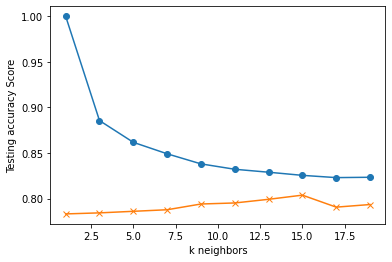

In [199]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn_grid_model = make_pipeline(MinMaxScaler(), KNeighborsClassifier(n_neighbors=k)) #StandardScaler
    knn_grid_model.fit(X_train, y_train)
    train_score = knn_grid_model.score(X_train, y_train)
    test_score = knn_grid_model.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [146]:
from sklearn.metrics import classification_report

# SVM Model Classification Report

In [147]:
svm_predictions = svm_model.predict(X_test_scaled)

In [148]:
print(classification_report(y_test, svm_predictions))

                precision    recall  f1-score   support

     CANDIDATE       0.68      0.46      0.55       422
     CONFIRMED       0.61      0.77      0.68       450
FALSE POSITIVE       0.98      1.00      0.99       876

      accuracy                           0.81      1748
     macro avg       0.75      0.74      0.74      1748
  weighted avg       0.81      0.81      0.80      1748



In [149]:
print(classification_report(svm_model.predict(X_test), y_test))

                precision    recall  f1-score   support

     CANDIDATE       1.00      0.34      0.51      1221
     CONFIRMED       0.00      0.00      0.00         0
FALSE POSITIVE       0.58      0.97      0.73       527

      accuracy                           0.53      1748
     macro avg       0.53      0.44      0.41      1748
  weighted avg       0.87      0.53      0.58      1748



# SVM Model with GridSearchCV Classification Report

In [150]:
svm_grid_predictions = svm_grid_model.predict(X_test_scaled)

In [151]:
print(classification_report(y_test, svm_grid_predictions))

                precision    recall  f1-score   support

     CANDIDATE       0.68      0.53      0.59       422
     CONFIRMED       0.63      0.74      0.68       450
FALSE POSITIVE       0.98      1.00      0.99       876

      accuracy                           0.82      1748
     macro avg       0.76      0.76      0.75      1748
  weighted avg       0.82      0.82      0.81      1748



In [152]:
print(classification_report(svm_grid_model.predict(X_test), y_test))

                precision    recall  f1-score   support

     CANDIDATE       0.99      0.28      0.44      1475
     CONFIRMED       0.00      0.00      0.00         0
FALSE POSITIVE       0.30      0.98      0.46       273

      accuracy                           0.39      1748
     macro avg       0.43      0.42      0.30      1748
  weighted avg       0.88      0.39      0.44      1748



# Decision Tree Classification Report

In [153]:
print(classification_report(clf.predict(X_test), y_test))

                precision    recall  f1-score   support

     CANDIDATE       0.71      0.73      0.72       409
     CONFIRMED       0.74      0.72      0.73       462
FALSE POSITIVE       0.98      0.98      0.98       877

      accuracy                           0.85      1748
     macro avg       0.81      0.81      0.81      1748
  weighted avg       0.85      0.85      0.85      1748



# Random Forest Model Classification Report

In [154]:
random_forest_predictions = random_forest_model.predict(X_test_scaled)

In [155]:
print(classification_report(random_forest_predictions, y_test))

                precision    recall  f1-score   support

     CANDIDATE       0.99      0.49      0.65       854
     CONFIRMED       0.00      0.00      0.00         0
FALSE POSITIVE       1.00      0.98      0.99       894

      accuracy                           0.74      1748
     macro avg       0.66      0.49      0.55      1748
  weighted avg       0.99      0.74      0.82      1748



In [156]:
print(classification_report(random_forest_model.predict(X_test), y_test))

                precision    recall  f1-score   support

     CANDIDATE       0.76      0.83      0.79       385
     CONFIRMED       0.83      0.80      0.81       469
FALSE POSITIVE       1.00      0.98      0.99       894

      accuracy                           0.90      1748
     macro avg       0.86      0.87      0.86      1748
  weighted avg       0.90      0.90      0.90      1748



# Random Forest Model with GridSearch Classification Report

In [157]:
random_forest_grid_predictions = random_forest_grid_model.predict(X_test_scaled)

In [158]:
print(classification_report(random_forest_grid_predictions, y_test))

                precision    recall  f1-score   support

     CANDIDATE       0.77      0.83      0.80       388
     CONFIRMED       0.83      0.80      0.81       464
FALSE POSITIVE       1.00      0.98      0.99       896

      accuracy                           0.90      1748
     macro avg       0.86      0.87      0.87      1748
  weighted avg       0.90      0.90      0.90      1748



In [159]:
print(classification_report(random_forest_grid_model.predict(X_test), y_test))

                precision    recall  f1-score   support

     CANDIDATE       0.99      0.49      0.65       854
     CONFIRMED       0.00      0.00      0.00         0
FALSE POSITIVE       1.00      0.98      0.99       894

      accuracy                           0.74      1748
     macro avg       0.66      0.49      0.55      1748
  weighted avg       0.99      0.74      0.82      1748



# KNN Model with GridSearchCV Classification Report

In [200]:
knn_predictions = knn.predict(X_test_scaled)

In [201]:
print(classification_report(knn_predictions, y_test))

                precision    recall  f1-score   support

     CANDIDATE       0.52      0.58      0.55       375
     CONFIRMED       0.62      0.59      0.60       479
FALSE POSITIVE       1.00      0.98      0.99       894

      accuracy                           0.79      1748
     macro avg       0.71      0.72      0.71      1748
  weighted avg       0.79      0.79      0.79      1748



In [202]:
print(classification_report(knn.predict(X_test), y_test))

                precision    recall  f1-score   support

     CANDIDATE       0.00      0.00      0.00         0
     CONFIRMED       0.00      0.00      0.00         0
FALSE POSITIVE       1.00      0.50      0.67      1748

      accuracy                           0.50      1748
     macro avg       0.33      0.17      0.22      1748
  weighted avg       1.00      0.50      0.67      1748



# KNN Model with GridSearchCV Classification Report

In [203]:
knn_grid_predictions = knn_grid_model.predict(X_test_scaled)

In [204]:
print(classification_report(knn_grid_predictions, y_test))

                precision    recall  f1-score   support

     CANDIDATE       0.99      0.47      0.64       879
     CONFIRMED       0.01      0.03      0.01        98
FALSE POSITIVE       0.86      0.98      0.92       771

      accuracy                           0.67      1748
     macro avg       0.62      0.49      0.52      1748
  weighted avg       0.88      0.67      0.73      1748



In [198]:
print(classification_report(knn_grid_model.predict(X_test), y_test))

                precision    recall  f1-score   support

     CANDIDATE       0.45      0.62      0.53       308
     CONFIRMED       0.71      0.59      0.64       546
FALSE POSITIVE       1.00      0.98      0.99       894

      accuracy                           0.79      1748
     macro avg       0.72      0.73      0.72      1748
  weighted avg       0.81      0.79      0.80      1748



# Save the Model

In [160]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
# import joblib
# filename = 'zen_svm_grid_model.sav'
# joblib.dump(svm_grid_model, filename)